In [45]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from __future__ import print_function
import numpy as np
import pandas as pd
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [46]:
def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
print(train_data.shape)
print(train_labels.shape)

(6000, 784)
(6000,)


In [47]:
indx = np.random.randint(600, size=100)
new_data = train_data[train_labels==0][idx]
new_labels = train_labels[train_labels==0][idx]
for i in range(1,10):
    new_data = np.vstack((new_data,train_data[train_labels==i][idx]))
    new_labels = np.concatenate((new_labels,train_labels[train_labels==i][idx]))
print(new_data.shape)    
print(new_labels.shape)

(1000, 784)
(1000,)


In [48]:
pca = PCA(n_components=2, svd_solver='full')
pca_data = pca.fit_transform(reduced_data)
print(pca_data.shape)

(1000, 2)


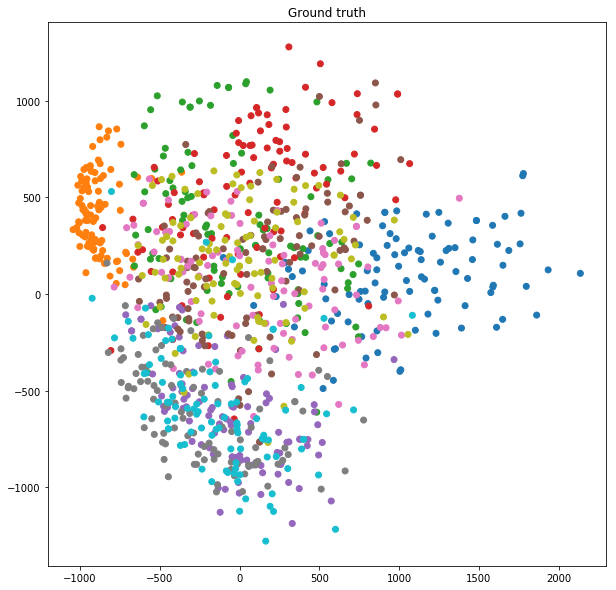

In [49]:
plt.figure(figsize=(10,10))
plt.scatter(pca_data[:,0],pca_data[:,1],c=new_labels,cmap ='tab10' )
plt.title("Ground truth")
plt.show()

In [50]:
def kmeans(k,p):
    clusterer = KMeans(n_clusters=k, random_state=p)
    cluster_labels = clusterer.fit_predict(pca_data)
    plt.figure(figsize=(10,10))
    plt.scatter(pca_data[:,0],pca_data[:,1],c=cluster_labels,cmap ='tab10' )
    plt.title("Output of k means with random state " + str(p))
    plt.show()    
    score1 = metrics.adjusted_rand_score(new_labels,cluster_labels)
    score2 = metrics.adjusted_mutual_info_score(new_labels,cluster_labels)
    score3 = metrics.v_measure_score(new_labels,cluster_labels)
    return [score1,score2,score3]

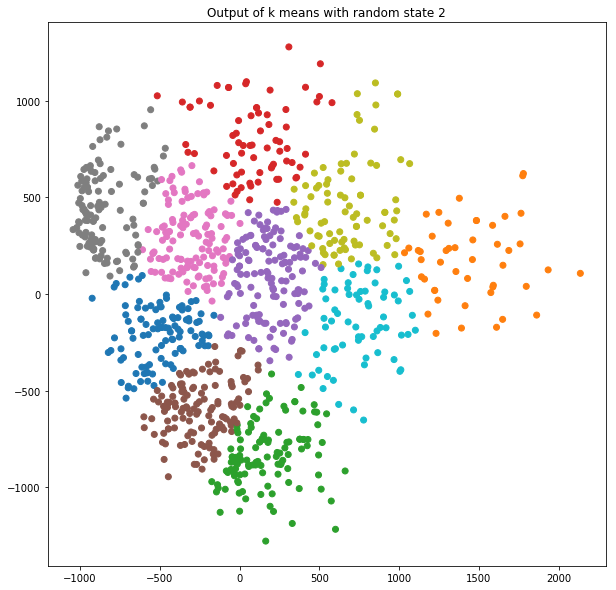

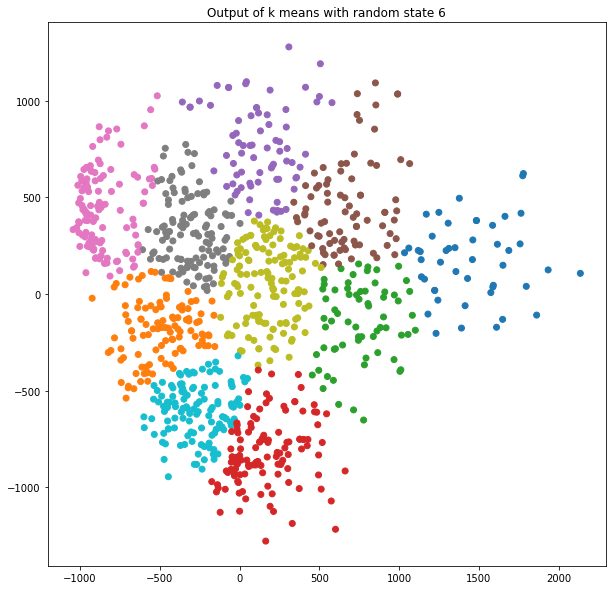

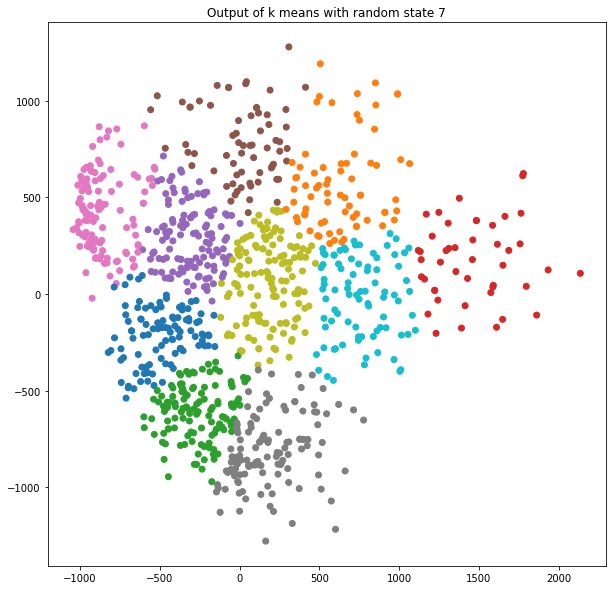

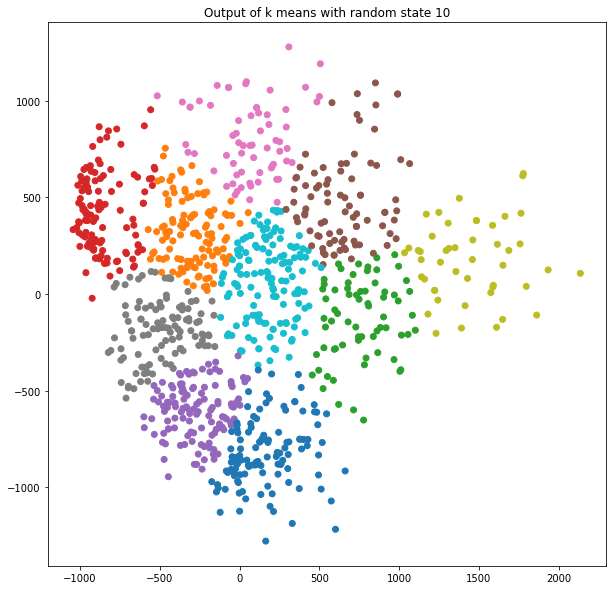

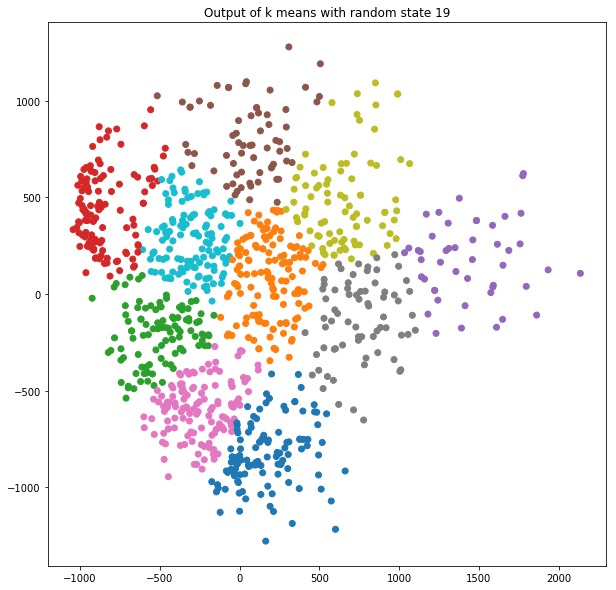

   Rand score  Mutual Information  V measure
0    0.219994            0.348729   0.364092
1    0.219203            0.347241   0.362476
2    0.224427            0.351646   0.367118
3    0.220222            0.349450   0.364861
4    0.220192            0.349251   0.364622


In [51]:
p=[2,6,7,10,19]
data1=[]
names=['Rand score','Mutual Information','V measure']
for i in range(5):
    table1=[]
    out=kmeans(10,p[i])
    table1.append(out[0])
    table1.append(out[1])
    table1.append(out[2])
    data1.append(table1)
df1 = pd.DataFrame(data1)
df1.columns = names
print(df1)

In [52]:
means = [np.mean(pca_data[new_labels==0],axis=0)]
for i in range(1,10):
    means.append(np.mean(pca_data[new_labels==i],axis=0))
means = np.array(means)
print(means.shape)

(10, 2)


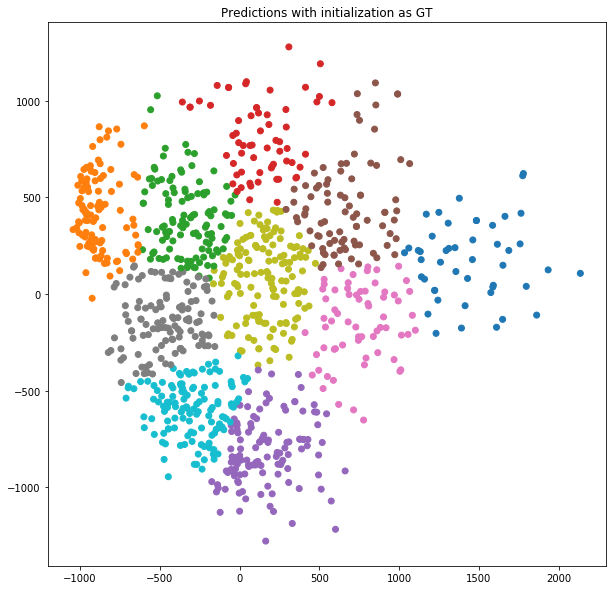

In [53]:
kmeans = KMeans(n_clusters=10,init = means).fit_predict(pca_data)
plt.figure(figsize=(10,10))
plt.scatter(pca_data[:,0],pca_data[:,1],c=kmeans,cmap ='tab10' )
plt.title("Predictions with initialization as GT")
plt.show()